# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

In [6]:
!gdown 1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA

Downloading...
From: https://drive.google.com/uc?id=1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA
To: /content/power_consumption_g3_feat.csv
100% 2.55M/2.55M [00:00<00:00, 95.6MB/s]


In [7]:
!gdown 1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD

Downloading...
From: https://drive.google.com/uc?id=1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD
To: /content/power_consumption_g3.csv
100% 1.67M/1.67M [00:00<00:00, 72.8MB/s]


In [17]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
pd.set_option('display.max_columns', None)

In [9]:
data1 = pd.read_csv('/content/power_consumption_g3_feat.csv')
data1.head(5)

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900


In [10]:
data2 = pd.read_csv('/content/power_consumption_g3.csv')
data2.head(5)

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766


In [11]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index('Date')
data1 = data1.sort_index()
data1.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085


In [12]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2 = data2.set_index('Date')
data2 = data2.sort_index()
data2.head(5)

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620


In [19]:
data1.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
dtype: int64

In [20]:
data1.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
dtype: int64

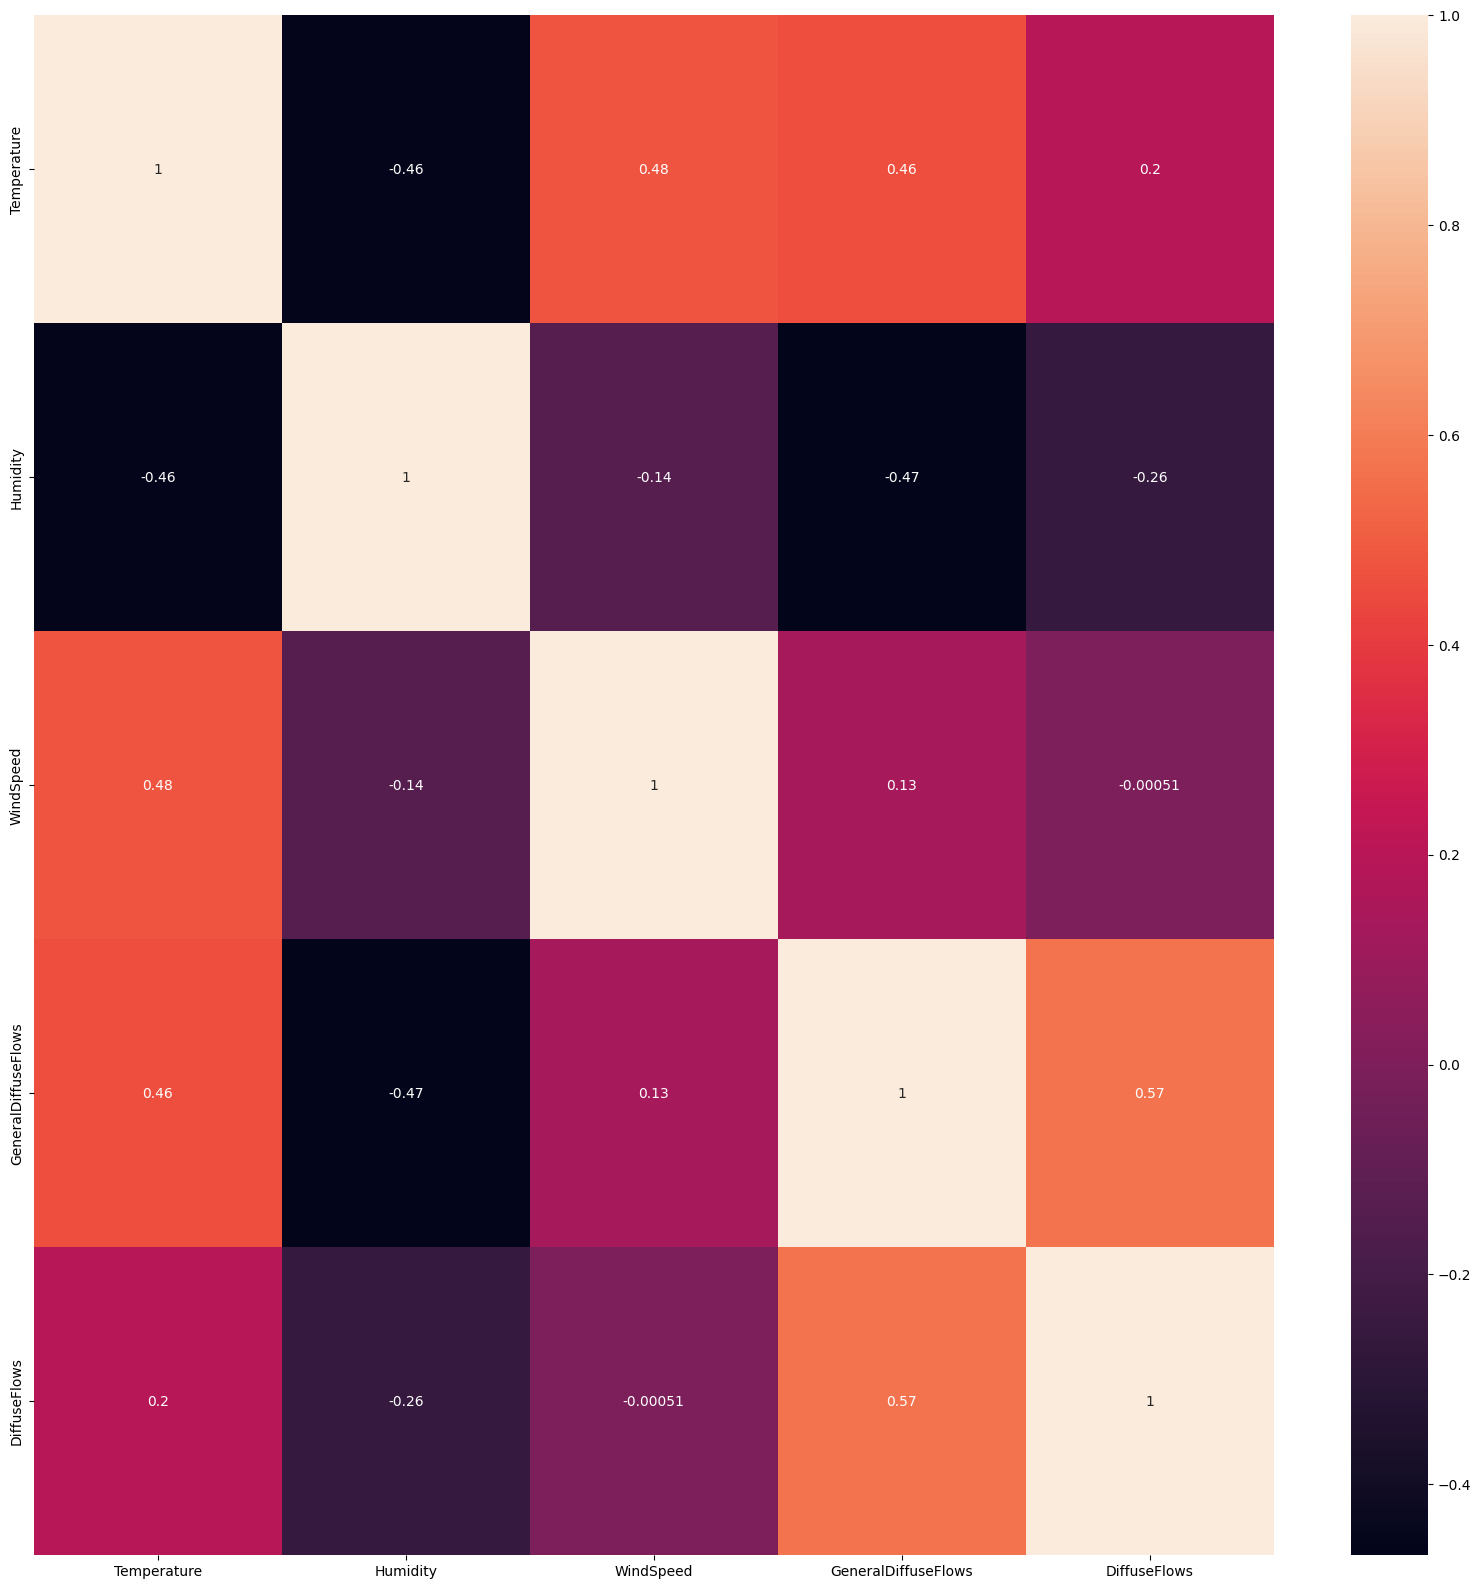

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [22]:
features = data1.columns

In [23]:
imputer = IterativeImputer()
data1[features] = imputer.fit_transform(data1[features])

In [24]:
data1.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
dtype: int64

In [25]:
data1 = data1.groupby(pd.Grouper(freq='120min')).mean()

In [26]:
data2 = data2.groupby(pd.Grouper(freq='120min')).mean()

In [27]:
data = pd.merge(data1, data2, left_index=True, right_index=True)

In [28]:
data.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.633981,76.753253,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872


In [29]:
data.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [30]:
columns = data.columns
columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower'],
      dtype='object')

In [31]:
lag = 4

for i in range(1, lag+1):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[f'{col}'].shift(i)

In [32]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_prev_1,Humidity_prev_1,WindSpeed_prev_1,GeneralDiffuseFlows_prev_1,...,WindSpeed_prev_3,GeneralDiffuseFlows_prev_3,DiffuseFlows_prev_3,SolarPower_prev_3,Temperature_prev_4,Humidity_prev_4,WindSpeed_prev_4,GeneralDiffuseFlows_prev_4,DiffuseFlows_prev_4,SolarPower_prev_4
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.633981,76.753253,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,6.633981,76.753253,0.081917,0.060167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,5.029333,78.008333,0.082583,0.061417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,...,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,...,0.082583,0.061417,0.135083,21447.088607,6.633981,76.753253,0.081917,0.060167,0.105667,26927.594937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,41.896234,0.077667,409.650000,42.163333,29293.789606,14.399167,38.129167,0.077667,489.841667,...,0.078083,76.933417,20.709175,23720.152091,11.221667,51.411015,0.078417,0.062917,0.112750,21307.984791
2017-12-30 16:00:00,14.015000,45.494726,0.077500,153.905000,152.368333,31262.864386,14.513333,41.896234,0.077667,409.650000,...,0.077000,353.441667,36.275833,29649.683142,11.082500,48.224167,0.078083,76.933417,20.709175,23720.152091
2017-12-30 18:00:00,10.112500,61.832590,0.075583,1.618917,1.676750,37721.673005,14.015000,45.494726,0.077500,153.905000,...,0.077667,489.841667,38.455000,30490.240812,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142


In [42]:
data = data.dropna(axis=0)

In [43]:
data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'SolarPower_prev_1', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'SolarPower_prev_2', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'SolarPower_prev_3', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'SolarPower_prev_4'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
features = data.drop(columns=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower'])

In [46]:
features

,Temperature_prev_1,Humidity_prev_1,WindSpeed_prev_1,GeneralDiffuseFlows_prev_1,DiffuseFlows_prev_1,SolarPower_prev_1,Temperature_prev_2,Humidity_prev_2,WindSpeed_prev_2,GeneralDiffuseFlows_prev_2,DiffuseFlows_prev_2,SolarPower_prev_2,Temperature_prev_3,Humidity_prev_3,WindSpeed_prev_3,GeneralDiffuseFlows_prev_3,DiffuseFlows_prev_3,SolarPower_prev_3,Temperature_prev_4,Humidity_prev_4,WindSpeed_prev_4,GeneralDiffuseFlows_prev_4,DiffuseFlows_prev_4,SolarPower_prev_4
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,6.633981,76.753253,0.081917,0.060167,0.105667,26927.594937
2017-01-01 10:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 12:00:00,8.019333,63.835833,2.913333,321.902379,34.108333,27986.835442,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 14:00:00,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495,8.019333,63.835833,2.913333,321.902379,34.108333,27986.835442,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 16:00:00,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495,8.019333,63.835833,2.913333,321.902379,34.108333,27986.835442,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,11.082500,48.224167,0.078083,76.933417,20.709175,23720.152091,11.221667,51.411015,0.078417,0.062917,0.112750,21307.984791
2017-12-30 16:00:00,14.513333,41.896234,0.077667,409.650000,42.163333,29293.789606,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,11.082500,48.224167,0.078083,76.933417,20.709175,23720.152091
2017-12-30 18:00:00,14.015000,45.494726,0.077500,153.905000,152.368333,31262.864386,14.513333,41.896234,0.077667,409.650000,42.163333,29293.789606,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142


In [47]:
X, Y = features, data['SolarPower']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1,1))

In [53]:
from xgboost import XGBRegressor

In [54]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [55]:
params = {
    "n_estimators": np.arange(50, 500, 100),
    "max_depth": [3, 5, 7]
}

In [56]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(5), param_grid=params)

In [57]:
grid_search.fit(X, Y, verbose=2)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150, 250, 350, 450])})

In [58]:
estimator = grid_search.best_estimator_

In [59]:
estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [63]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1,1))

In [64]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
preds = estimator.predict(X_test)

In [66]:
preds = scaler.inverse_transform(preds.reshape(-1,1))

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(3922615.8502216516, 1524.6999134228236, 0.882682717553864)

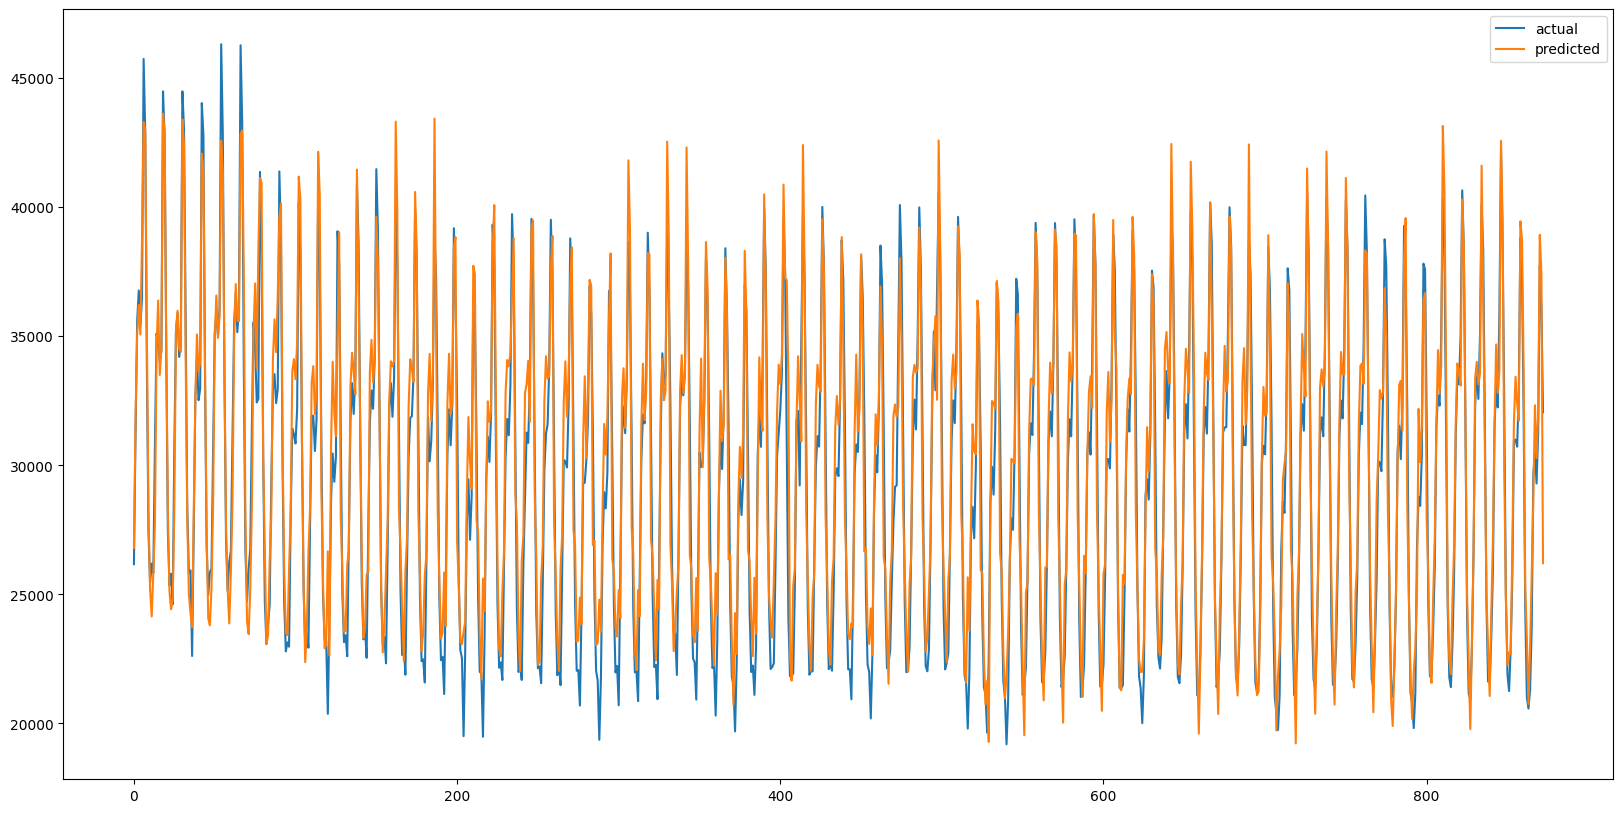

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()